<a href="https://colab.research.google.com/github/MaxMaffio/InterviewQuery/blob/main/Doordash_Delivery_Time_Estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Doordash](https://raw.githubusercontent.com/interviewquery/takehomes/doordash_1/doordash_1/logo.png)
# Overview

In this exercise, you will use your machine learning experience to solve
a straightforward but challenging prediction​ ​problem.​ ​The​ ​exercise​
​contains two​​ parts​

1. Building​ ​a​ ​machine​ ​learning​ model​ ​ ​for​ ​a​ ​prediction ​ task​
2. Writing ​ an​ ​ application​ ​ to​ ​ make​ ​ ​predictions ​ using​ ​ ​that​ ​model.

In Part 1, we would love to have you exhibit your modeling skills. You
will be evaluated on the following - performance on the test set,
feature engineering choices including features used and encoding of
features, data processing, choice of models used, description of model
performance and insights and observations from the​ ​model.

Part 2 is your chance to show off your software engineering skills. This
includes performance of the application, adherence to common software
engineering patterns (unit tests, modular code, etc.) and ability to
make educated​ ​trade-offs​ ​based​ ​on​ ​the​ ​given ​ constraints.​

**NOTE:** For​ this part, you must use a production ready language like
Python. Thus, please do not use R.

# Problem ​Description

When​ a​ ​consumer​ ​places​ ​an​ ​order​ ​on​ DoorDash,​​ we​ ​ show​ ​ the​ ​ ​expected ​
​time of​​ ​delivery.​ ​It​ ​is​ ​very ​important​ ​for​ DoorDash to get this right, as it has a big impact on consumer experience. In this exercise, you will build a model to predict the
estimated time taken for a delivery and write an application that can
make these predictions.

Concretely, for a given delivery you must predict the ​**total delivery
duration seconds** , i.e., the time taken from

- Start:​ ​the​ ​time​ ​consumer​ ​submits​ ​the​ ​order ​ (​`created_at`) ​ to​
- End:​ ​when​ ​the​ ​order​ ​will​ ​be​ ​delivered​ to​ ​ ​the​ consumer​​
​(`actual_delivery_time`).

To​ ​help​ ​with​ ​this,​ ​we​ ​have​ ​provided

-   `historical_data.csv`:​ ​table​ ​of​ ​historical​ ​deliveries

-   `data_to_predict.json`: ​ ​Json​ ​list​ ​of​ ​deliveries​ ​that​ ​you​ ​must​
    ​predict​ ​on​ ​(for ​​the​ ​second​ ​part)

-   `data_description.txt`:​ ​ description​ ​ of​ ​ all​ ​ columns​ ​ in​​ `historical_data.csv`​ ​and​ ​details​ of​ `data_to_predict.json`

# Requirements

## Part ​ 1​

-   Build a model to predict the total delivery duration seconds (as
    defined above). Feel free to generate additional​ ​features​ ​from​ ​the ​ given​ ​ data​ ​ to​ ​ improve​ ​ model​ ​performance.​
-   Explain a) model(s) used, b) how you evaluated your model
    performance on the historical data, c) any data processing you
    performed on the data, d) feature engineering choices you made
    and e) other information​ ​you​ ​would​ ​like​ ​us​ ​to​ ​know​ ​about​ ​your​
    ​modeling​ ​approach.
-   Based ​ on​ ​ the​ ​ ​findings ​​from​ ​the​ ​model,​ list​​ ​recommendations​ to​​
    ​reduce​ ​delivery​ ​time

### Deliverables

-   Submit one document that includes a write-up explaining your model,
    choices made and discussion on the​ ​questions ​ above.​
-   Submit​ ​the​ ​code​ ​used​ ​for​ ​this​ ​part

## Part ​ 2​
-   Write an application that accepts data from the json file
    (`data_to_predict.json`), uses the model to make a prediction for each
    delivery in the json file and writes out predictions to a new ​*tab separated file* (`tsv`) with​ ​columns​ ​-​ ​`delivery_id`, ​`predicted_delivery_seconds`

-   Your predictions on this test data set will be evaluated using RMSE
    (Root Mean Squared Error) and your ​ score​ ​ must​ ​ exceed​ ​ a​ ​ baseline​
    ​ set​ ​ for​ ​ the​ ​ ​task.

### Deliverables

-   Code that ​​outputs a​ ​`tsv`​ ​file​ ​that​ ​gives ​the​​ ​prediction​ ​for​ ​the​
     `data_to_predict.json` data.​ This application (that makes
    predictions) must be runnable from the command line with
    `data_to_predict.json` passed as input. Include instructions for
    running the code (dependencies,​ ​packages​ ​required,​ ​etc.)

# Notes

We expect the exercise to take 5-6 hours in total, but feel free to
spend as much time as you like on it. Feel free to​ ​use​ ​any​ ​open​ ​source​
​packages​ ​for​ ​the​ ​task.

**Thank**​ ​**you**​ ​**for**​ ​**your**​ ​**hard**​ ​**work!**​ ​**Please**​ ​**let**​
​**us**​ ​**know**​ ​**if**​ ​**you**​ ​**have**​ ​**any**​ ​**questions.**​ ​**Good**​
​**luck!**


In [1]:
!cat data_description.txt

cat: data_description.txt: No such file or directory


In [2]:
!git clone --branch doordash_1 https://github.com/interviewquery/takehomes.git
%cd takehomes/doordash_1
!ls

fatal: destination path 'takehomes' already exists and is not an empty directory.
/content/takehomes/doordash_1
data_description.txt  historical_data.csv  metadata.json       takehomes
data_to_predict.json  logo.png		   takehomefile.ipynb


In [3]:
!pip install optuna

In [4]:
import os
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from xgboost import cv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error
from time import time
# for Bayesian hyperparameter optimization with Optuna
import optuna
import optuna.logging
from optuna.samplers import TPESampler
os.listdir()

['takehomefile.ipynb',
 'data_to_predict.json',
 'metadata.json',
 'historical_data.csv',
 'takehomes',
 'data_description.txt',
 'logo.png']

# READ DATA

In [5]:
# read historical_data.csv
df = pd.read_csv("historical_data.csv")
print(df.shape)
# create target variable
df["actual_delivery_time"] = pd.to_datetime(df["actual_delivery_time"])
df["created_at"] = pd.to_datetime(df["created_at"])
df["delivery_duration_seconds"] = (df["actual_delivery_time"] - df["created_at"]).dt.total_seconds()
# add order_id
df.reset_index(drop=False,inplace=True)
df.rename(columns={"index":"order_id"},inplace=True)

# print
print(df.shape)
df.head()

(197428, 16)
(197428, 18)


,order_id,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration_seconds
0,0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0
1,1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0
2,2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0
3,3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0
4,4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0


In [6]:
# clean the dataset
# remove records where the target variable can not be calculated
df = df[df["actual_delivery_time"].isna()==False]
# remove outliers
n_upper_threshold =  np.percentile(df['delivery_duration_seconds'], q=99)
df = df[df["delivery_duration_seconds"]<n_upper_threshold]
print(df.shape)

(195446, 18)


In [7]:
#pd.read_json("data_to_predict.json",lines=True).head()

# EXPLORATIVE ANALYSIS

## market_id

In [8]:
# for each market, count the number of unique store and how many they are
df.groupby(["market_id"], as_index=False).agg({"store_id":["nunique", "count"], "store_primary_category":["nunique", "count"]})

market_id store_id        store_primary_category       
             nunique  count                nunique  count
0       1.0     2912  37294                     70  36711
1       2.0     1924  54723                     64  53634
2       3.0     2546  23039                     65  22473
3       4.0     1806  47246                     65  46291
4       5.0     1399  17862                     59  17279
5       6.0     1305  14308                     62  13865

## store_primary_category

In [9]:
# store primary category
print("Number of unique values: " + str(df["store_primary_category"].nunique()))
print("NaN values: " + str(df["store_primary_category"].isna().sum()) )
sorted(df["store_primary_category"].astype(str).unique().tolist())[0:10]

Number of unique values: 74
NaN values: 4702


['afghan',
 'african',
 'alcohol',
 'alcohol-plus-food',
 'american',
 'argentine',
 'asian',
 'barbecue',
 'belgian',
 'brazilian']

## delivery_duration_seconds

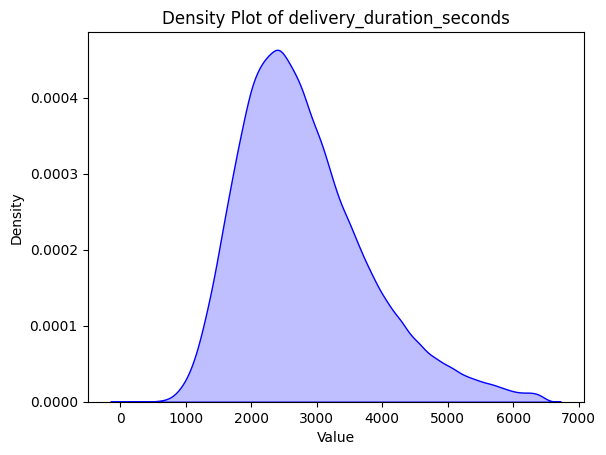

In [10]:
# plot density of delivery_duration_seconds
# Create the density plot
sns.kdeplot(df["delivery_duration_seconds"], fill=True, color="blue", bw_adjust=1)  # `fill=True` for a shaded plot

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density Plot of delivery_duration_seconds')
plt.show()

In [11]:
# Calculate percentiles from 0 to 100 every 10
list_percentiles = [0,10,20,30,40,50,60,70,80,90,99,99.99,100]
percentiles = np.percentile(df['delivery_duration_seconds'], q=list_percentiles)

# Display the result as a dataframe for clarity
percentile_df = pd.DataFrame({
    'Percentile': list_percentiles,
    'Value': percentiles
})
percentile_df

,Percentile,Value
0,0.00,101.00
1,10.00,1695.00
2,20.00,1981.00
3,30.00,2211.00
4,40.00,2428.00
5,50.00,2648.00
6,60.00,2890.00
7,70.00,3177.00
8,80.00,3557.00
9,90.00,4155.50


## estimated_order_place_duration

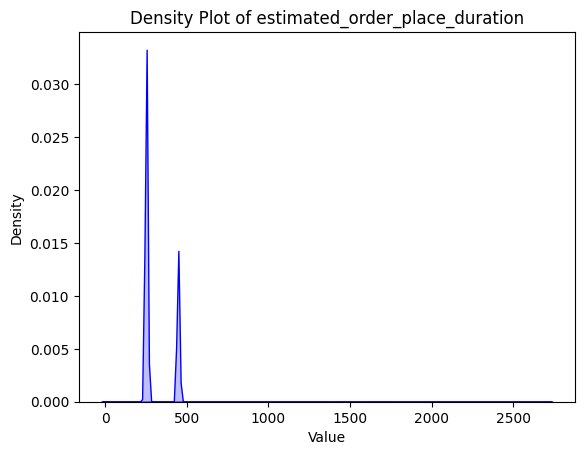

In [12]:
# plot density of estimated_order_place_duration
# Create the density plot
sns.kdeplot(df["estimated_order_place_duration"], fill=True, color="blue", bw_adjust=1)  # `fill=True` for a shaded plot

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density Plot of estimated_order_place_duration')
plt.show()

In [13]:
# Calculate percentiles from 0 to 100 every 10
list_percentiles = [0,10,20,30,40,50,60,70,80,90,99,100]
percentiles = np.percentile(df['estimated_order_place_duration'], q=list_percentiles)

# Display the result as a dataframe for clarity
percentile_df = pd.DataFrame({
    'Percentile': list_percentiles,
    'Value': percentiles
})
percentile_df

,Percentile,Value
0,0,0.0
1,10,251.0
2,20,251.0
3,30,251.0
4,40,251.0
5,50,251.0
6,60,251.0
7,70,251.0
8,80,446.0
9,90,446.0


## estimated_store_to_consumer_driving_duration

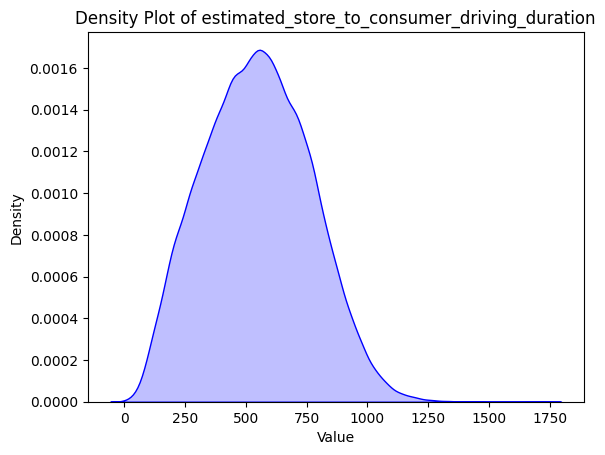

In [14]:
# plot density of estimated_store_to_consumer_driving_duration
# Create the density plot
sns.kdeplot(df["estimated_store_to_consumer_driving_duration"], fill=True, color="blue", bw_adjust=1)  # `fill=True` for a shaded plot

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density Plot of estimated_store_to_consumer_driving_duration')
plt.show()

# FEATURE ENGINEER

## fillna

In [15]:
list_cols = df.columns
df_na = pd.DataFrame(columns=["column","NaN"])

for str_col in list_cols:
  df_na_subset = pd.DataFrame({"column":[str_col], "NaN":[df[str_col].isna().sum()]})
  df_na = pd.concat([df_na, df_na_subset])
df_na[df_na["NaN"]>0]

,column,NaN
0,market_id,974
0,store_primary_category,4702
0,order_protocol,987
0,total_onshift_dashers,16103
0,total_busy_dashers,16103
0,total_outstanding_orders,16103
0,estimated_store_to_consumer_driving_duration,523


In [16]:
# list of columns with NaN values
list_cols_with_nan = df_na.loc[df_na["NaN"]>0, "column"].tolist()
list_cols_with_nan

['market_id',
 'store_primary_category',
 'order_protocol',
 'total_onshift_dashers',
 'total_busy_dashers',
 'total_outstanding_orders',
 'estimated_store_to_consumer_driving_duration']

In [17]:
# count NaN for each column
for str_col in list_cols_with_nan:
  print(str_col + " : has " + str(df[str_col].isna().sum()) + " NaN values")

market_id : has 974 NaN values
store_primary_category : has 4702 NaN values
order_protocol : has 987 NaN values
total_onshift_dashers : has 16103 NaN values
total_busy_dashers : has 16103 NaN values
total_outstanding_orders : has 16103 NaN values
estimated_store_to_consumer_driving_duration : has 523 NaN values


In [18]:
# convert the NaN values
for str_col in list_cols_with_nan:
  df[str_col].fillna(0, inplace=True)

<ipython-input-18-e7eb560f076e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[str_col].fillna(0, inplace=True)


# MODEL

In [19]:
# target variable
str_target_variable = "delivery_duration_seconds"

## split train-test set

In [20]:
# train and test set
X = df.copy()
y = df[str_target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(136812, 18)
(58634, 18)


## encode categorical variables

In [21]:
# list of categorical variables
list_cat_features = df.select_dtypes(include=['object']).columns.tolist()
# print
print(len(list_cat_features))
print(list_cat_features)

# as there is only 1 categorical variable, we can isolate it
# count the NaN values
X_train["store_primary_category"] = X_train["store_primary_category"].fillna("NA")
X_test["store_primary_category"] = X_test["store_primary_category"].fillna("NA")


# encode the categoroical variable with Target Encoding procedure
str_cat_feature = list_cat_features[0]
df_encode = X_train.groupby(str_cat_feature, as_index=False).agg({"delivery_duration_seconds":"mean"})
df_encode.columns = [str_cat_feature, str_cat_feature+"_encode"]
df_encode.head()
# merge the encoded variable with the main dataset
X_train = X_train.merge(df_encode, on = str_cat_feature, how="left")
X_test = X_test.merge(df_encode, on = str_cat_feature, how="left")

1
['store_primary_category']


## features selection

In [22]:
 # list encoded features
 list_features_encode = ["store_primary_category_encode"]

list_features = ['order_id',
 'market_id',
 #'created_at',
 #'actual_delivery_time',
 'store_id',
 #'store_primary_category',
 'order_protocol',
 'total_items',
 'subtotal',
 'num_distinct_items',
 'min_item_price',
 'max_item_price',
 'total_onshift_dashers',
 'total_busy_dashers',
 'total_outstanding_orders',
 'estimated_order_place_duration',
 'estimated_store_to_consumer_driving_duration',
 #'delivery_duration_seconds'
 ] + list_features_encode

# select the features
X_train = X_train[list_features].fillna(0)
X_test = X_test[list_features].fillna(0)

## hyperparameter tuning

In [27]:
### Bayesian Optimization for Hyperparameter Tuning with OPTUNA
def objective(trial):

    # search space
    n_estimators = trial.suggest_int('n_estimators', low=50, high=200, step=50)
    n_learning_rate = trial.suggest_float('learning_rate', low=0.01, high=0.3, step=0.01)
    #criterion = trial.suggest_categorical('criterion', ['squared_error', 'friedman_mse'])
    min_samples_split = trial.suggest_int('min_samples_split', low=2, high=4, step=1)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', low=1, high=5, step=1)
    max_depth = trial.suggest_int('max_depth', low=5, high=7, step=1)
    #max_features = trial.suggest_categorical('max_features', [ 'sqrt','log2'])

    # random forest classifier
    gbr = GradientBoostingRegressor(n_estimators=n_estimators,
                                 #criterion=criterion,
                                 min_samples_split=min_samples_split,
                                 min_samples_leaf=min_samples_leaf,
                                 max_depth=max_depth,
                                 #max_features=max_features
                                    )

    # return score
    return cross_val_score(estimator=gbr,
                             X=X_train,
                             y=y_train,
                             #scoring='f1_micro',
                             #n_jobs=-1
                           ).mean()

# create a study (aim to maximize score)
study = optuna.create_study(sampler=TPESampler(), direction='maximize')

# perform hyperparamter tuning (while timing the process)
start = time()
study.optimize(objective, n_trials=2)
total_time = time() - start

print(f"---Bayesian Optimization---")
print(f"Total time: {total_time:.2f} seconds")
print(f"Number of iterations: {100}")
print(f"Best trial index: {study.best_trial.number}")
print(f"Best score: {study.best_trial.value}")
print(f"Best hyperparameters: {study.best_params}")

# bert parameter
param_best = study.best_params

# fix them
param_best = {'n_estimators': 200,
 'learning_rate': 0.23,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 7}

[I 2025-01-22 15:29:28,192] A new study created in memory with name: no-name-6a68e5fd-daec-483e-bc9b-0a67950ae0f9
[I 2025-01-22 15:35:56,253] Trial 0 finished with value: 0.3271133527282526 and parameters: {'n_estimators': 100, 'learning_rate': 0.17, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_depth': 7}. Best is trial 0 with value: 0.3271133527282526.
[I 2025-01-22 15:48:25,294] Trial 1 finished with value: 0.3383040087578917 and parameters: {'n_estimators': 200, 'learning_rate': 0.23, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 7}. Best is trial 1 with value: 0.3383040087578917.


---Bayesian Optimization---
Total time: 1137.10 seconds
Number of iterations: 100
Best trial index: 1
Best score: 0.3383040087578917
Best hyperparameters: {'n_estimators': 200, 'learning_rate': 0.23, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 7}


In [ ]:
# GridSearchCV
'''
## hyperparameters
param_grid = {
    'learning_rate': [0.1,0.2,0.5,0.7],
    'n_estimators': [80,100,150,200],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
}

# force hyperparameters, as Colab interrupt forcely the runtime
param_grid = {
    'learning_rate': [0.1],
    #'n_estimators': [80,100,150,200],
    #'max_depth': [80, 90, 100, 110],
    #'max_features': [2, 3],
    #'min_samples_leaf': [3, 4, 5],
    #'min_samples_split': [8, 10, 12],
}

# evaluate the model
model = GradientBoostingRegressor()
# grid search cv
grid_search = GridSearchCV(estimator = model,
                           param_grid = param_grid,
                           cv = 3,
                           #n_jobs = -1,
                           verbose = True)
# fit the cv
grid_search.fit(X_train, y_train)
'''

## fit XGBoosting

In [33]:
# Initialize and train the Gradient Boosting Regression model
gb_regressor = GradientBoostingRegressor(
    n_estimators = param_best["n_estimators"],
    learning_rate = param_best["learning_rate"],
    min_samples_split = param_best["min_samples_split"],
    min_samples_leaf = param_best["min_samples_leaf"],
    max_depth = param_best["max_depth"]
    )
gb_regressor.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.23, max_depth=7, n_estimators=200)

## performances

In [34]:
# Make predictions on the test set
y_pred = gb_regressor.predict(X_test)

In [35]:
# Evaluate the model's performance
## MEAN SQUARED ERROR
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
## ROOT MEAN SQUARED ERROR
rmse = root_mean_squared_error(y_test, y_pred)
print(f"Root Mean Squared Error: {rmse}")
## MEAN ABSOLUTE ERROR
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 642477.8077068615
Root Mean Squared Error: 801.5471338024118
Mean Absolute Error: 612.328472241049


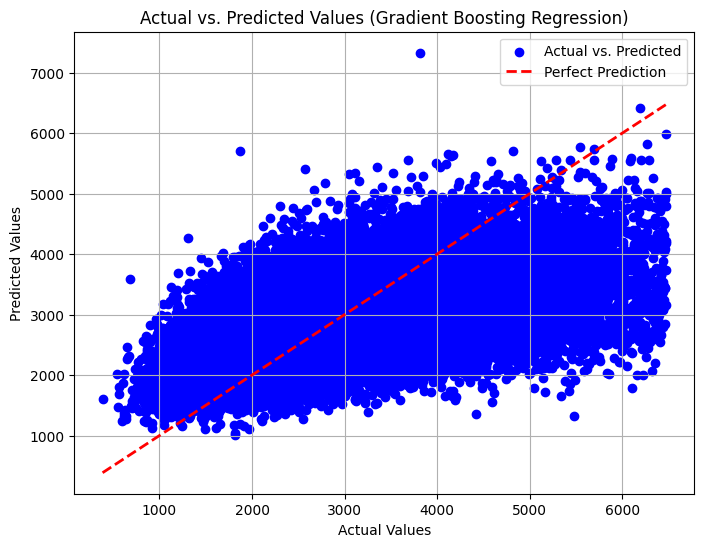

In [36]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', marker='o', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Gradient Boosting Regression)')
plt.legend()
plt.grid(True)
plt.show()